In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
iu = pd.read_excel('InternetUsageXL.xlsx')
gdp = pd.read_excel('GDPXL.xlsx')

#source for this data: un.data.org

##### NOTE: VALUE1: GDP , VALUE2: INTERNET USAGE

## Considering only 'GDP real rates of growth (percent)' 

In [13]:
#removing the rest of the data
for x in gdp.index:
  if gdp.loc[x, "Series"] != 'GDP real rates of growth (percent)':
    gdp.drop(x, inplace = True)
    
display(gdp)

,Region/Country/Area,Unnamed: 1,Year,Series,Value1,Footnotes,Source
21,1,"Total, all countries or areas",1995,GDP real rates of growth (percent),3.1,NaN,"United Nations Statistics Division, New York, ..."
22,1,"Total, all countries or areas",2005,GDP real rates of growth (percent),4.1,NaN,"United Nations Statistics Division, New York, ..."
23,1,"Total, all countries or areas",2010,GDP real rates of growth (percent),4.4,NaN,"United Nations Statistics Division, New York, ..."
24,1,"Total, all countries or areas",2015,GDP real rates of growth (percent),3.1,NaN,"United Nations Statistics Division, New York, ..."
25,1,"Total, all countries or areas",2017,GDP real rates of growth (percent),3.4,NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
6768,716,Zimbabwe,2010,GDP real rates of growth (percent),19.7,NaN,"United Nations Statistics Division, New York, ..."
6769,716,Zimbabwe,2015,GDP real rates of growth (percent),1.8,NaN,"United Nations Statistics Division, New York, ..."
6770,716,Zimbabwe,2017,GDP real rates of growth (percent),4.7,NaN,"United Nations Statistics Division, New York, ..."
6771,716,Zimbabwe,2018,GDP real rates of growth (percent),4.8,NaN,"United Nations Statistics Division, New York, ..."


## Extracting only the required columns from the dataframes

In [14]:
iu1 = iu.drop(['Region/Country/Area', 'Series', 'Footnotes', 'Source'], axis = 1)
display(iu1)

gdp1 = gdp.drop(['Region/Country/Area', 'Series', 'Footnotes', 'Source', 'Unnamed: 1', 'Year'], axis = 1)
display(gdp1)

,Unnamed: 1,Year,Value2
0,"Total, all countries or areas",2000,6.5
1,"Total, all countries or areas",2005,16.8
2,"Total, all countries or areas",2010,29.3
3,"Total, all countries or areas",2015,41.1
4,"Total, all countries or areas",2017,46.3
...,...,...,...
1352,Zimbabwe,2000,0.4
1353,Zimbabwe,2005,2.4
1354,Zimbabwe,2010,6.4
1355,Zimbabwe,2015,22.7


,Value1
21,3.1
22,4.1
23,4.4
24,3.1
25,3.4
...,...
6768,19.7
6769,1.8
6770,4.7
6771,4.8


## Combining the dataframes

In [15]:
df = pd.concat([iu1, gdp1], axis=1, join='inner')
display(df)

cpy = df

,Unnamed: 1,Year,Value2,Value1
21,Eastern Africa,2000,0.2,3.1
22,Eastern Africa,2005,1.3,4.1
23,Eastern Africa,2010,4.5,4.4
24,Eastern Africa,2015,14.5,3.1
25,Eastern Africa,2017,17.3,3.4
...,...,...,...,...
1339,Wallis and Futuna Islands,2005,6.7,7.8
1340,Wallis and Futuna Islands,2010,8.2,-3.8
1341,Yemen,2000,0.1,2.5
1342,Yemen,2005,1.0,3.2


## Dropping the average results from the dataframe

In [16]:
df.drop(df[(df['Unnamed: 1'] == 'Total, all countries or areas')].index, inplace=True)
display(df)

,Unnamed: 1,Year,Value2,Value1
21,Eastern Africa,2000,0.2,3.1
22,Eastern Africa,2005,1.3,4.1
23,Eastern Africa,2010,4.5,4.4
24,Eastern Africa,2015,14.5,3.1
25,Eastern Africa,2017,17.3,3.4
...,...,...,...,...
1339,Wallis and Futuna Islands,2005,6.7,7.8
1340,Wallis and Futuna Islands,2010,8.2,-3.8
1341,Yemen,2000,0.1,2.5
1342,Yemen,2005,1.0,3.2


## Considering data only for the year 2019

In [17]:
df3 = df.drop(df[(df['Year'] != 2019)].index)
display(df3)

,Unnamed: 1,Year,Value2,Value1
27,Eastern Africa,2019,17.4,2.4
55,Northern America,2019,88.9,3.0
83,Asia,2019,42.7,3.7
111,South-eastern Asia,2019,51.8,2.7
139,Oceania,2019,68.2,5.0
192,Armenia,2019,66.5,1.2
251,Belgium,2019,90.3,1.6
277,Bolivia (Plurin. State of),2019,47.5,2.4
305,Brunei Darussalam,2019,95.0,1.0
389,Colombia,2019,65.0,0.4


## Sorting by GDP

In [18]:
#only ascending order of gdp in 2019
df3.sort_values(by=['Value1'])

,Unnamed: 1,Year,Value2,Value1
1337,Viet Nam,2019,68.7,-10.4
1029,Puerto Rico,2019,77.7,-4.4
1057,Romania,2019,73.7,-2.8
1119,Serbia,2019,77.4,-0.7
1314,Uruguay,2019,77.4,-0.6
1201,Sweden,2019,94.5,0.2
389,Colombia,2019,65.0,0.4
976,Pakistan,2019,17.1,0.9
833,Malta,2019,85.8,0.9
305,Brunei Darussalam,2019,95.0,1.0


## Finding the top 10 countries with highest and lowest GDPs in 2019

In [19]:
low_gdp = df3.sort_values(by=['Value1']).head(10)
high_gdp = df3.sort_values(by=['Value1']).tail(10)

display(low_gdp)
display(high_gdp)

,Unnamed: 1,Year,Value2,Value1
1337,Viet Nam,2019,68.7,-10.4
1029,Puerto Rico,2019,77.7,-4.4
1057,Romania,2019,73.7,-2.8
1119,Serbia,2019,77.4,-0.7
1314,Uruguay,2019,77.4,-0.6
1201,Sweden,2019,94.5,0.2
389,Colombia,2019,65.0,0.4
976,Pakistan,2019,17.1,0.9
833,Malta,2019,85.8,0.9
305,Brunei Darussalam,2019,95.0,1.0


,Unnamed: 1,Year,Value2,Value1
55,Northern America,2019,88.9,3.0
83,Asia,2019,42.7,3.7
917,Netherlands,2019,93.3,3.8
1257,Turkey,2019,74.0,3.9
446,Czechia,2019,80.9,4.8
139,Oceania,2019,68.2,5.0
417,Côte d’Ivoire,2019,36.3,5.1
890,Morocco,2019,74.4,5.5
1284,United Arab Emirates,2019,99.2,6.6
1002,Peru,2019,60.0,13.1


## Considering the data only for 'Serbia' (one of the lowest GDP in 2019)

In [38]:
df_serbia = df.drop(df[(df['Unnamed: 1'] != 'Serbia')].index)
display(df_serbia)

,Unnamed: 1,Year,Value2,Value1
1114,Serbia,2005,26.3,1.2
1115,Serbia,2010,40.9,-3.3
1116,Serbia,2015,65.3,5.7
1117,Serbia,2017,70.3,2.0
1118,Serbia,2018,73.4,0.9
1119,Serbia,2019,77.4,-0.7


In [20]:
display(df.loc[df['Unnamed: 1'] == 'Viet Nam']) #Lowest GDP in 2019

,Unnamed: 1,Year,Value2,Value1
1337,Viet Nam,2019,68.7,-10.4


## Considering the data only for 'Northern America' (highest GDP in 2019)

In [23]:
df_na = df.drop(df[(df['Unnamed: 1'] != 'Northern America')].index)
display(df_na)

,Unnamed: 1,Year,Value2,Value1
49,Northern America,2000,43.9,2.6
50,Northern America,2005,68.3,6.2
51,Northern America,2010,72.5,5.7
52,Northern America,2015,76.1,2.8
53,Northern America,2017,87.8,3.3
54,Northern America,2018,88.9,3.3
55,Northern America,2019,88.9,3.0


## Considering the data only for 'India' 

In [24]:
display(df.loc[df['Unnamed: 1'] == 'India'])

,Unnamed: 1,Year,Value2,Value1


In [25]:
df_india = df.drop(df[(df['Unnamed: 1'] != 'India')].index)
display(df_india)

,Unnamed: 1,Year,Value2,Value1


## Visual Representation

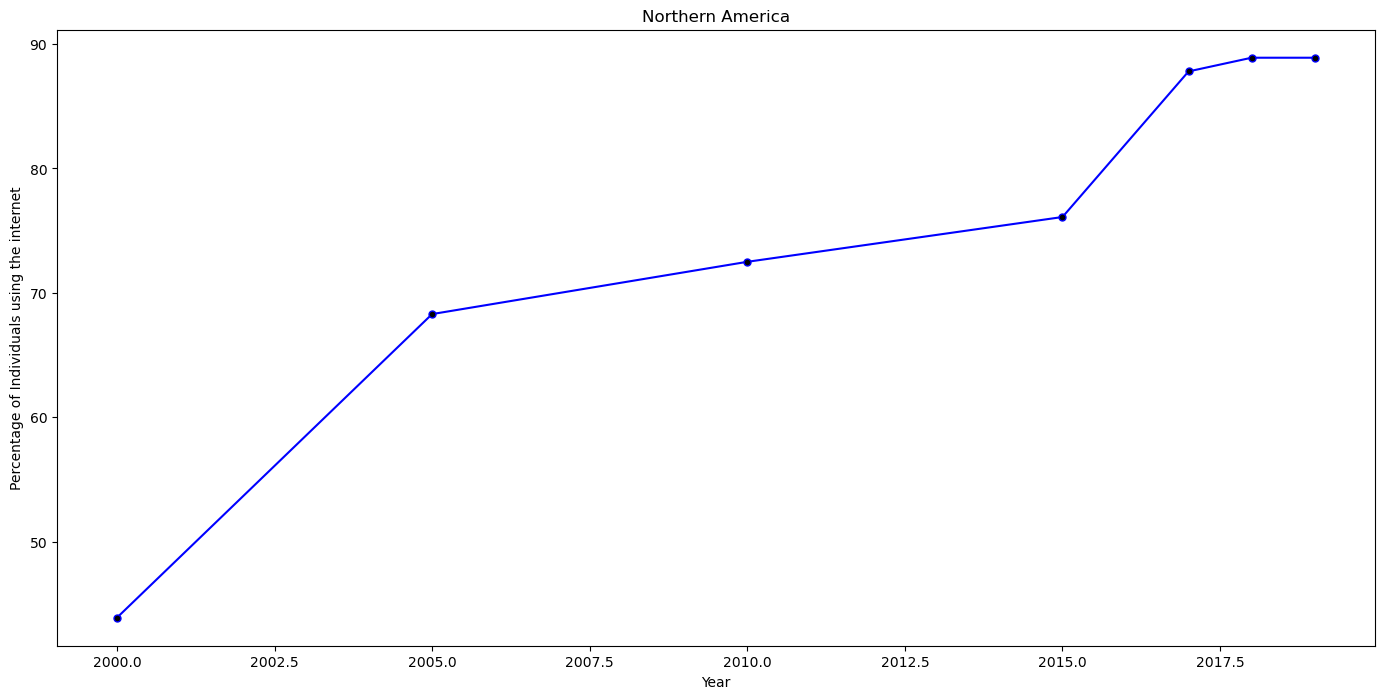

In [88]:
plt.style.use('default')
plt.figure(figsize=(17, 8))
plt.plot(df_na.Year, df_na.Value2, color='blue', marker = 'o', markerfacecolor='black', markersize=5)
plt.title('Northern America')
plt.ylabel('Percentage of Individuals using the internet')
plt.xlabel('Year')
plt.show()

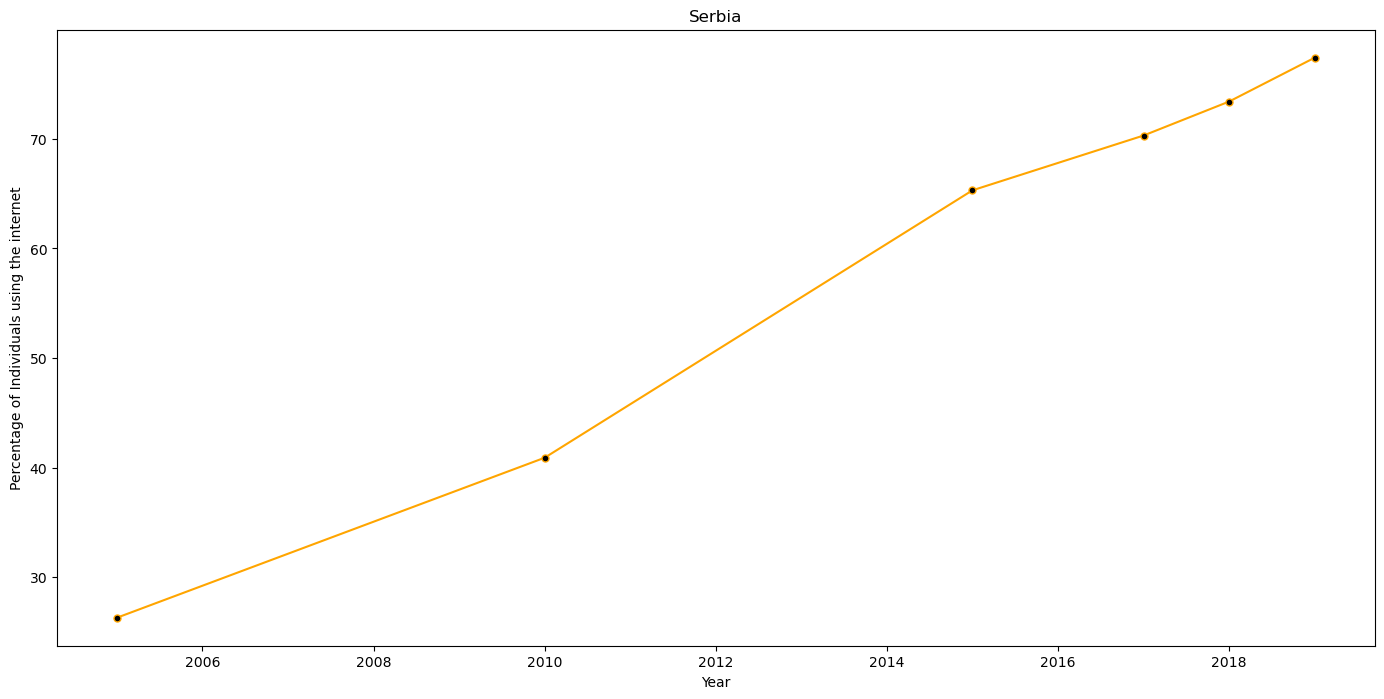

In [89]:
plt.style.use('default')
plt.figure(figsize=(17, 8))
plt.plot(df_serbia.Year, df_serbia.Value2, color='orange', marker = 'o', markerfacecolor='black', markersize=5)
plt.title('Serbia')
plt.ylabel('Percentage of Individuals using the internet')
plt.xlabel('Year')
plt.show()

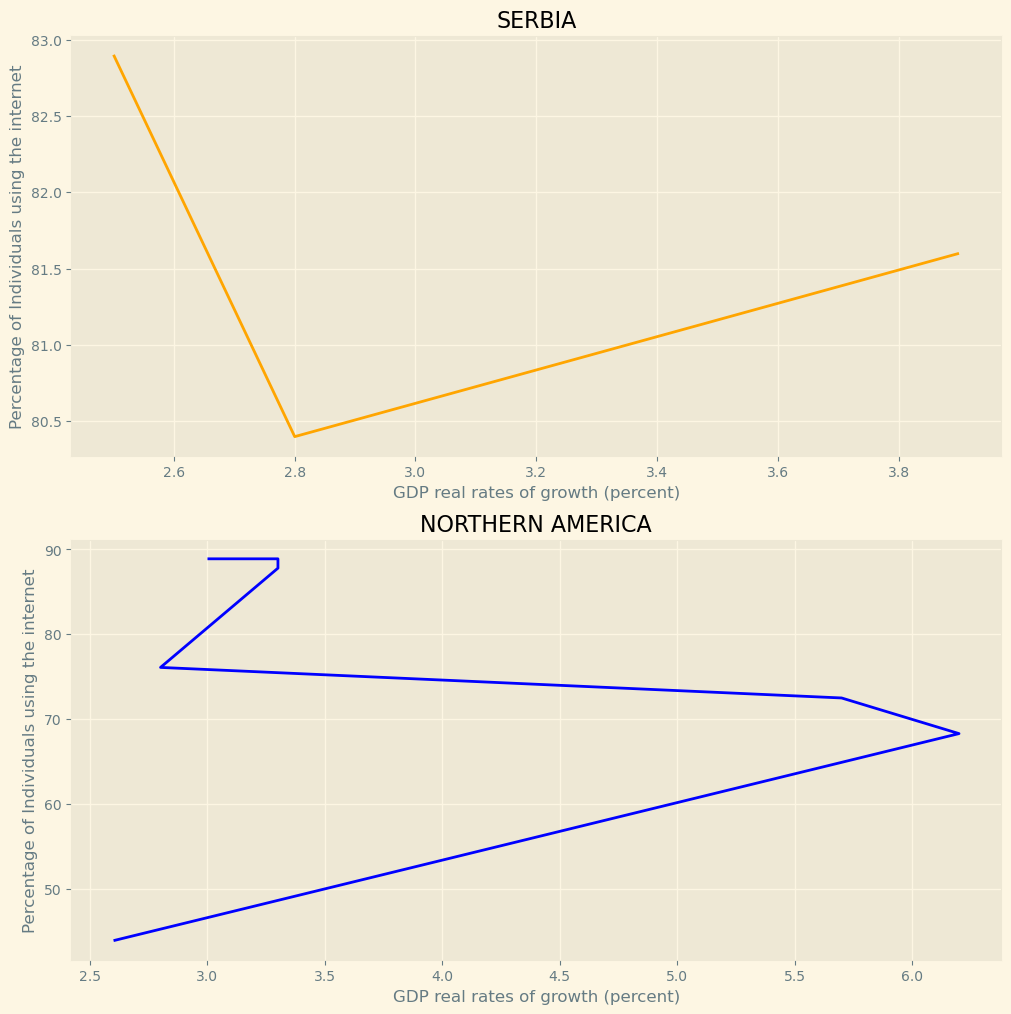

In [104]:
plt.style.use('Solarize_Light2')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(df_serbia.Value1, df_serbia.Value2, color ='orange')
ax1.set(title = "SERBIA",
       ylabel = "Percentage of Individuals using the internet",
       xlabel = "GDP real rates of growth (percent)");

ax2.plot(df_na.Value1, df_na.Value2, color ='blue')
ax2.set(title = "NORTHERN AMERICA",
       ylabel = "Percentage of Individuals using the internet",
       xlabel = "GDP real rates of growth (percent)");

plt.show()

## Sorting by Internet Usage

In [91]:
#only ascending order of internet usage in 2019
df3.sort_values(by=['Value2'])

,Unnamed: 1,Year,Value2,Value1
976,Pakistan,2019,17.1,0.9
27,Eastern Africa,2019,17.4,2.4
417,Côte d’Ivoire,2019,36.3,5.1
83,Asia,2019,42.7,3.7
277,Bolivia (Plurin. State of),2019,47.5,2.4
670,Indonesia,2019,47.7,1.7
111,South-eastern Asia,2019,51.8,2.7
1002,Peru,2019,60.0,13.1
389,Colombia,2019,65.0,0.4
192,Armenia,2019,66.5,1.2


## Finding the top 10 countries with highest and lowest GDPs in 2019

In [92]:
low_iu = df3.sort_values(by=['Value2']).head(10)
high_iu = df3.sort_values(by=['Value2']).tail(10)

display(low_iu)
display(high_iu)

,Unnamed: 1,Year,Value2,Value1
976,Pakistan,2019,17.1,0.9
27,Eastern Africa,2019,17.4,2.4
417,Côte d’Ivoire,2019,36.3,5.1
83,Asia,2019,42.7,3.7
277,Bolivia (Plurin. State of),2019,47.5,2.4
670,Indonesia,2019,47.7,1.7
111,South-eastern Asia,2019,51.8,2.7
1002,Peru,2019,60.0,13.1
389,Colombia,2019,65.0,0.4
192,Armenia,2019,66.5,1.2


,Unnamed: 1,Year,Value2,Value1
1143,Slovakia,2019,82.9,2.5
833,Malta,2019,85.8,0.9
694,Israel,2019,86.8,1.5
55,Northern America,2019,88.9,3.0
251,Belgium,2019,90.3,1.6
1173,Spain,2019,90.7,2.4
917,Netherlands,2019,93.3,3.8
1201,Sweden,2019,94.5,0.2
305,Brunei Darussalam,2019,95.0,1.0
1284,United Arab Emirates,2019,99.2,6.6


## Considering the data only for 'Pakistan' (lowest Internet Usage in 2019)

In [93]:
df_pak = df.drop(df[(df['Unnamed: 1'] != 'Pakistan')].index)
display(df_pak)

,Unnamed: 1,Year,Value2,Value1
973,Pakistan,2010,8.0,15.0
974,Pakistan,2015,14.0,15.0
975,Pakistan,2017,17.1,4.9
976,Pakistan,2019,17.1,0.9


## Considering the data only for 'Slovakia' (highest Internet Usage in 2019)

In [95]:
df_slovakia = df.drop(df[(df['Unnamed: 1'] != 'Slovakia')].index)
display(df_slovakia)

,Unnamed: 1,Year,Value2,Value1
1141,Slovakia,2017,81.6,3.9
1142,Slovakia,2018,80.4,2.8
1143,Slovakia,2019,82.9,2.5


## Visual Representation

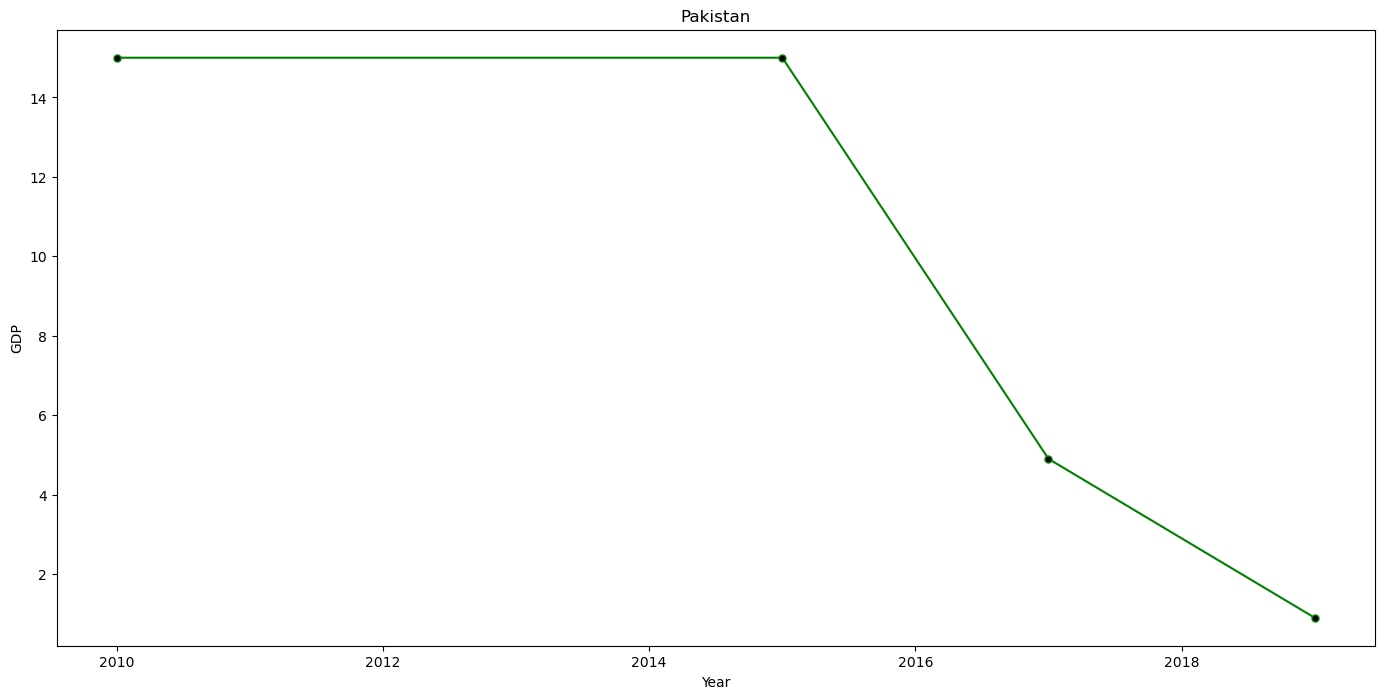

In [97]:
plt.style.use('default')
plt.figure(figsize=(17, 8))
plt.plot(df_pak.Year, df_pak.Value1, color='green', marker = 'o', markerfacecolor='black', markersize=5)
plt.title('Pakistan')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

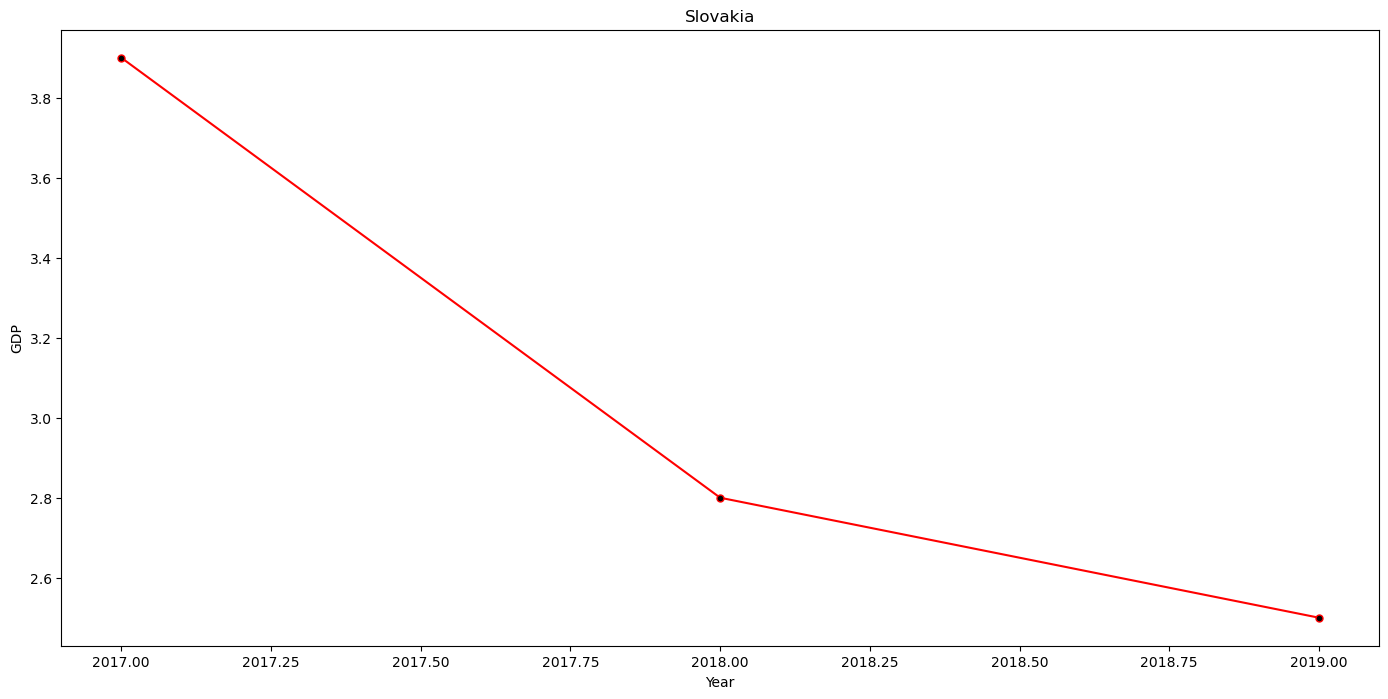

In [100]:
plt.style.use('default')
plt.figure(figsize=(17, 8))
plt.plot(df_slovakia.Year, df_slovakia.Value1, color='red', marker = 'o', markerfacecolor='black', markersize=5)
plt.title('Slovakia')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

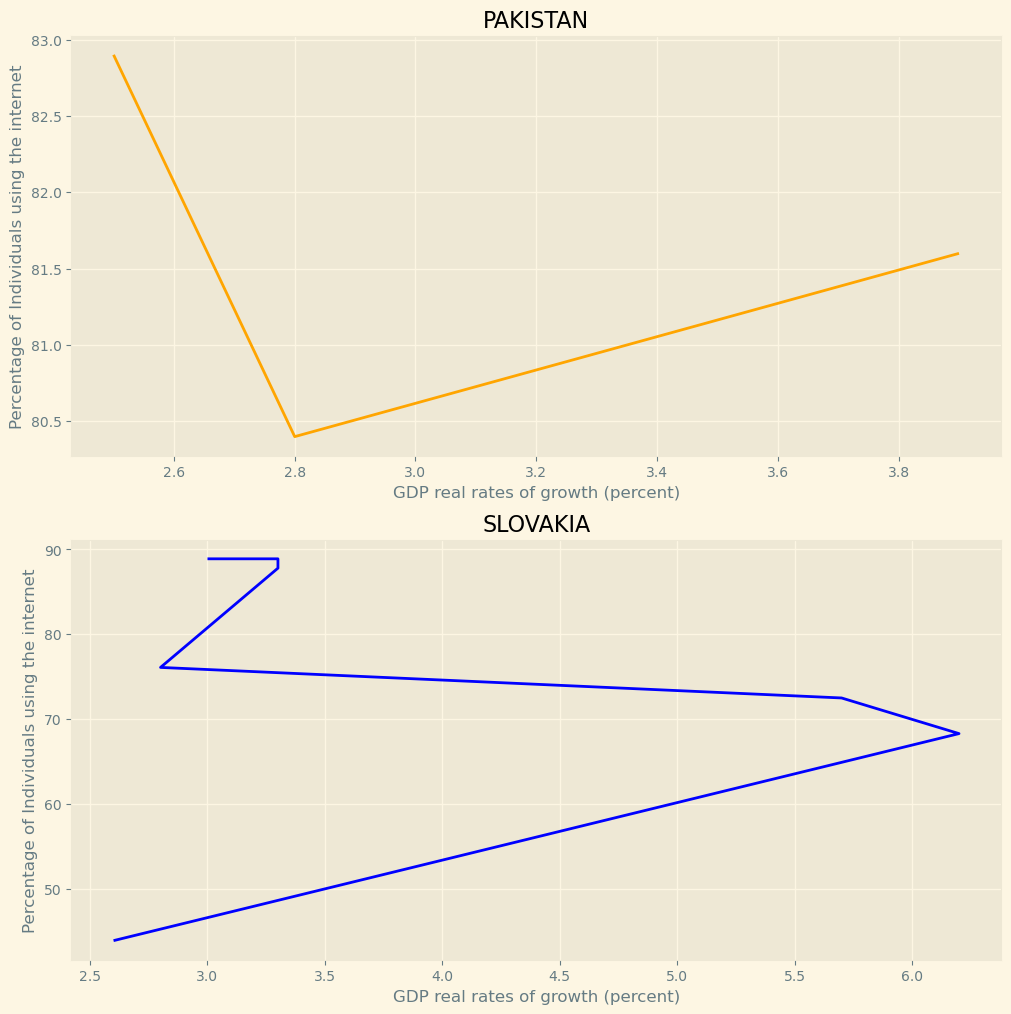

In [105]:
plt.style.use('Solarize_Light2')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(df_serbia.Value1, df_serbia.Value2, color ='orange')
ax1.set(title = "PAKISTAN",
       ylabel = "Percentage of Individuals using the internet",
       xlabel = "GDP real rates of growth (percent)");

ax2.plot(df_na.Value1, df_na.Value2, color ='blue')
ax2.set(title = "SLOVAKIA",
       ylabel = "Percentage of Individuals using the internet",
       xlabel = "GDP real rates of growth (percent)");

plt.show()